         id                  title   type  \
0   tm87233  It's a Wonderful Life  MOVIE   
1  tm143047              Duck Soup  MOVIE   
2   tm83884        His Girl Friday  MOVIE   
3   ts20945      The Three Stooges   SHOW   
4    tm5012              Red River  MOVIE   

                                         description  release_year  \
0  A holiday favourite for generations...  George...          1946   
1  Rufus T. Firefly is named president/dictator o...          1933   
2  Hildy, the journalist former wife of newspaper...          1940   
3  The Three Stooges were an American vaudeville ...          1934   
4  Headstrong Thomas Dunson starts a thriving Tex...          1948   

  age_certification  runtime  \
0                PG      130   
1               NaN       69   
2               NaN       92   
3             TV-PG       19   
4               NaN      133   

                                              genres production_countries  \
0  ['drama', 'family', 'fantasy', 'rom

<AxesSubplot:xlabel='release_year'>

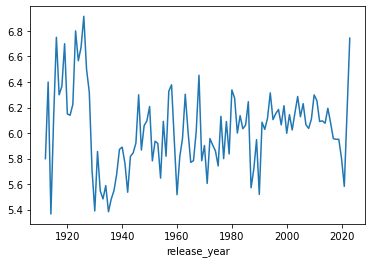

In [2]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Amazon_titles.csv')
print(data.head())

# print the data types
print(data.dtypes)

#plt.plot(data['imdb_score'])
data.groupby('release_year')['imdb_score'].mean().plot()

#plt.scatter(data['release_year'], data['imdb_score'])
#plt.show()

In [3]:
#KNN Classifier
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the data
df = pd.read_csv("Amazon_titles.csv")

# create a one-hot encoded version of the release_year column
year = pd.get_dummies(df['release_year'].apply(pd.Series).stack()).sum(level=0)

# concatenate the one-hot encoded year with the other features
X = pd.concat([df[['release_year', 'runtime', 'imdb_votes']], year], axis=1)

# select the target variable
y = df['imdb_score'].apply(lambda x: 1 if x >= 7 else 0)  # convert imdb_score to binary class (good/bad)

# drop any rows that contain missing values
X = X.dropna(axis=0)
y = y.loc[X.index]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit the KNN classifier on the training set
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("KNN Classifier:")
print("Accuracy:", accuracy)
print('Precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('tn, fp, fn, tp:', tn, fp, fn, tp)

C:\Users\fionn\AppData\Local\Temp\ipykernel_26316\865703434.py:11: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  year = pd.get_dummies(df['release_year'].apply(pd.Series).stack()).sum(level=0)
C:\Users\fionn\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\fionn\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNN Classifier:
Accuracy: 0.743208610968734
Precision: 0.4454828660436137
recall: 0.30686695278969955
f1: 0.36340533672172803
tn, fp, fn, tp: 1307 178 323 143


In [4]:
# decision tree classifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the data
df = pd.read_csv("Amazon_titles.csv")

# create a one-hot encoded version of the release_year column
year = pd.get_dummies(df['release_year'].apply(pd.Series).stack()).sum(level=0)

# concatenate the one-hot encoded year with the other features
X = pd.concat([df[['release_year', 'runtime', 'imdb_votes']], year], axis=1)

# select the target variable
y = df['imdb_score'].apply(lambda x: 1 if x >= 7 else 0)  # convert imdb_score to binary 

# drop any rows that contain missing values
X = X.dropna(axis=0)
y = y.loc[X.index]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit the decision tree classifier on the training set
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)

# make predictions on the test set
y_pred = dtc.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Decision Tree Classifier")
print("Accuracy:", accuracy)
print('Precision:', precision)
print('recall:', recall)
print('f1:', f1)
print('tn, fp, fn, tp:', tn, fp, fn, tp)


Decision Tree Classifier
Accuracy: 0.7191184008200923
Precision: 0.42023346303501946
recall: 0.463519313304721
f1: 0.4408163265306122
tn, fp, fn, tp: 1187 298 250 216


C:\Users\fionn\AppData\Local\Temp\ipykernel_26316\2480415733.py:11: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  year = pd.get_dummies(df['release_year'].apply(pd.Series).stack()).sum(level=0)
C:\Users\fionn\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\fionn\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
